# Analysis for  "The Impact of Covid-19 on Sports Betting Markets"

## Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [ ]:
!git clone https://github.com/zlisto/covid_betting

import os
os.chdir("covid_betting")

## Import Packages

In [1]:
import warnings
from analytics.results import *
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os
import sys
from matplotlib import colors
from typing import *

FONTSIZE_TICKS = 16
FONTSIZE_AXES = 20
FONTSIZE_TITLE = 24

# Import Data

Only keep games where the odds satisfy the following criterion:

1) Underdog odds >100 

2) -200<= Underdog odds <=-100

3) Favorite odds <=-100

In [2]:
data = pd.read_csv(FILE_NAME_CLEAN)
print("Sport\ttotal games\tnormal games\tcovid games")
for sport in data.sport.unique():
    n = len(data[data['sport']==sport])
    ncovid = len(data[(data['sport']==sport) & (data['covid']==True)])
    
    print(f"{sport}\t{n}\t\t{n-ncovid}\t\t {ncovid}")
data.head()

Sport	total games	normal games	covid games
NBA	14058		13353		 705
NFL	2935		2666		 269
NHL	13275		12659		 616
MLB	27239		26295		 944
NCAAF	8656		7957		 699
NCAAB	45508		41726		 3782


,Unnamed: 0,Unnamed: 0.1,Final_home,Final_visitor,ML_favorite,ML_home,ML_underdog,ML_visitor,Team_home,Team_visitor,...,underdog,underdog_profit,win_favorite,win_underdog,winner,prob_underdog,profit_margin_underdog,prob_underdog_bin,season_covid,covid_status
0,0,0,117.0,113.0,-135.0,-135.0,115.0,115.0,Boston,Cleveland,...,visitor,-1.00,1.0,0.0,home,0.465116,-1.00,0.5,2009-2010,Normal
1,1,1,81.0,100.0,-220.0,-220.0,180.0,180.0,LALakers,SanAntonio,...,visitor,1.80,0.0,1.0,visitor,0.357143,1.80,0.4,2009-2010,Normal
2,2,2,107.0,92.0,-875.0,-875.0,588.0,588.0,Orlando,Memphis,...,visitor,-1.00,1.0,0.0,home,0.145349,-1.00,0.2,2009-2010,Normal
3,3,3,133.0,102.0,-188.0,-188.0,163.0,163.0,Indiana,Houston,...,visitor,-1.00,1.0,0.0,home,0.380228,-1.00,0.4,2009-2010,Normal
4,4,4,112.0,113.0,-385.0,-385.0,318.0,318.0,Toronto,GoldenState,...,visitor,3.18,0.0,1.0,visitor,0.239234,3.18,0.3,2009-2010,Normal


# Figure: underdog implied win probability by sport

Compare the aggregate implied underdog win probability by sport.  From this figure we see that NHL and MLB are near random chance (0.5), while in college sports underdogs have a very low chance of winning.  

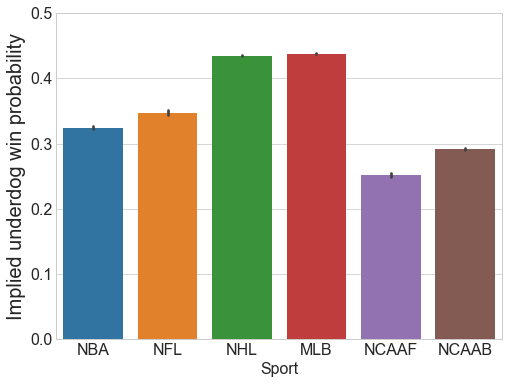

In [4]:
fig = plt.figure(figsize = (8,6))
ax = sns.barplot(data = data[data.covid==False], x = 'sport', y = 'prob_underdog' )
plt.xlabel('Sport',fontsize = 16)
plt.ylabel('Implied underdog win probability',fontsize = FONTSIZE_AXES)
plt.xticks(fontsize = FONTSIZE_TICKS)
plt.yticks(fontsize = FONTSIZE_TICKS)
plt.ylim([0.0,0.5])

plt.show()



# Table: total points stats

Table of mean, st. dev. and coef. variation of total points per game

In [5]:
df_pts = pd.read_csv(FILE_NAME_PPG)
df_pts.head()

,Unnamed: 0,sport,mean,stdev,coef.var.
0,0,NBA,205.3,22.1,0.107647
1,1,NFL,45.3,14.1,0.311258
2,2,NHL,5.6,2.3,0.410714
3,3,MLB,8.8,4.4,0.500000
4,4,NCAAB,139.6,19.8,0.141834


Text(0.5, 0, 'Sport')

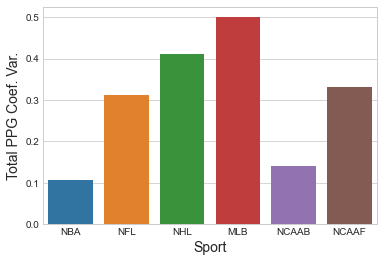

In [6]:
sns.barplot(data = df_pts, x = 'sport', y = 'coef.var.')
plt.ylabel("Total PPG Coef. Var.", fontsize = 14)
plt.xlabel("Sport", fontsize = 14)

# Figure: underdog implied win probability vs. actual win probability by sport

Plot the mean implied and actual win probabilities of underdogs by sport, during normal times and during COVID-19. 



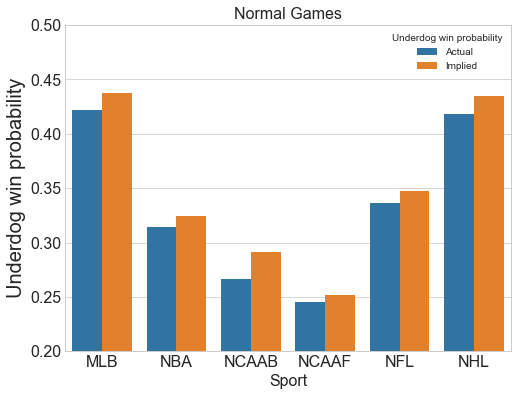

In [7]:
df_plot =  data[data.covid==False].groupby(by = ['sport']).mean()
df_plot['sport'] = df_plot.index
df_plot['efficiency'] = df_plot.win_underdog/df_plot.prob_underdog
df_plot1 = pd.melt(df_plot, id_vars=['sport'], value_vars=['win_underdog', 'prob_underdog'])


fig = plt.figure(figsize = (8,6))

plt.subplot(1,1,1)
ax = sns.barplot(data = df_plot1, x = 'sport', y = 'value', hue = 'variable')
labels = ['Actual','Implied']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Underdog win probability")

plt.xlabel('Sport',fontsize = 16)
plt.ylabel('Underdog win probability',fontsize = FONTSIZE_AXES)
plt.xticks(fontsize = FONTSIZE_TICKS)
plt.yticks(fontsize = FONTSIZE_TICKS)
plt.ylim([0.2,0.5])
plt.title("Normal Games", fontsize = 16)
plt.show()





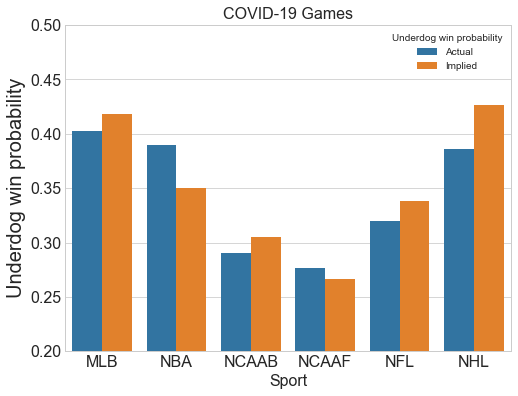

In [8]:
df_plot = data[data.covid==True].groupby(by = ['sport']).mean()
df_plot['sport'] = df_plot.index
df_plot['efficiency'] = df_plot.win_underdog/df_plot.prob_underdog
df_plot1 = pd.melt(df_plot, id_vars=['sport'], value_vars=['win_underdog', 'prob_underdog'])


fig = plt.figure(figsize = (8,6))

plt.subplot(1,1,1)
ax = sns.barplot(data = df_plot1, x = 'sport', y = 'value', hue = 'variable')
labels = ['Actual','Implied']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Underdog win probability")

plt.xlabel('Sport',fontsize = 16)
plt.ylabel('Underdog win probability',fontsize = FONTSIZE_AXES)
plt.xticks(fontsize = FONTSIZE_TICKS)
plt.yticks(fontsize = FONTSIZE_TICKS)
plt.ylim([0.2,0.5])
plt.title("COVID-19 Games", fontsize = 16)

plt.show()





# Figure: Underdog profit margin by sport

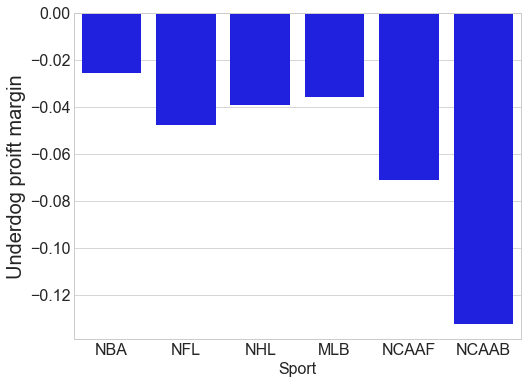

In [9]:
df_plot = data.groupby(by = ['sport']).mean()
df_plot['sport'] = df_plot.index
df_plot['efficiency'] = df_plot.win_underdog/df_plot.prob_underdog
df_plot = df_plot.reindex(['NBA','NFL','NHL','MLB','NCAAF','NCAAB'])

df_plot1 = pd.melt(df_plot, id_vars=['sport'], value_vars=['win_underdog', 'prob_underdog'])


fig = plt.figure(figsize = (8,6))

plt.subplot(1,1,1)
ax = sns.barplot(data = df_plot, x = 'sport', y = 'profit_margin_underdog',color = 'blue')
plt.xlabel('Sport',fontsize = 16)
plt.ylabel('Underdog proift margin',fontsize = FONTSIZE_AXES)
plt.xticks(fontsize = FONTSIZE_TICKS)
plt.yticks(fontsize = FONTSIZE_TICKS)




plt.show()

## Underdog profit margin for COVID-19 vs normal times

Plot of  underdog profit margin grouped by sport and COVID-19 status. The error bars represent 95% confidence intervals.

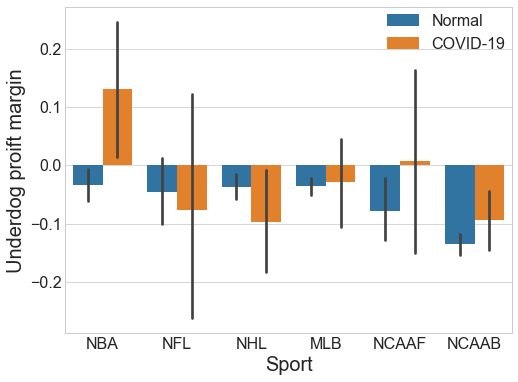

In [10]:
fig = plt.figure(figsize = (8,6))

plt.subplot(1,1,1)
ax = sns.barplot(data = data, x = 'sport', y = 'profit_margin_underdog',
                 hue = 'covid_status', palette = "tab10")
plt.xlabel('Sport',fontsize = FONTSIZE_AXES)
plt.ylabel('Underdog proift margin',fontsize = FONTSIZE_AXES)
plt.xticks(fontsize = FONTSIZE_TICKS,rotation = 0)
plt.yticks(fontsize = FONTSIZE_TICKS)
plt.legend(loc=1, borderaxespad=0, fontsize=FONTSIZE_TICKS)


plt.show()



## Underdog win prob. for COVID-19 vs normal times

Plot of  underdog win probability grouped by sport and COVID-19 status. The error bars represent 95% confidence intervals.

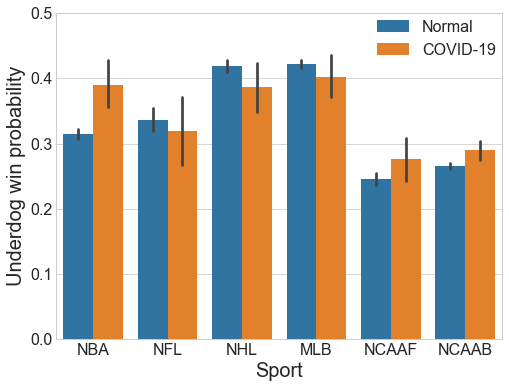

In [11]:
fig = plt.figure(figsize = (8,6))

plt.subplot(1,1,1)
ax = sns.barplot(data = data, x = 'sport', y = 'win_underdog',
                 hue = 'covid_status',
                 palette = "tab10",)
plt.xlabel('Sport',fontsize = FONTSIZE_AXES)
plt.ylabel('Underdog win probability',fontsize = FONTSIZE_AXES)
plt.xticks(fontsize = FONTSIZE_TICKS,rotation = 0)
plt.yticks(fontsize = FONTSIZE_TICKS)
plt.legend(loc=1, borderaxespad=0, fontsize=FONTSIZE_TICKS)
plt.ylim([0,0.5])



plt.show()



In [12]:
print("Sport:\tUPM normal\tUPM COVID-19")
for sport in data.sport.unique():
    p0 = data.profit_margin_underdog[(data.covid==False) & (data.sport==sport)].mean()
    p1 = data.profit_margin_underdog[(data.covid==True) & (data.sport==sport)].mean()
    print(f"{sport}:\t{p0:.3f}\t\t{p1:.3f}")

Sport:	UPM normal	UPM COVID-19
NBA:	-0.034		0.131
NFL:	-0.045		-0.076
NHL:	-0.036		-0.097
MLB:	-0.036		-0.029
NCAAF:	-0.078		0.007
NCAAB:	-0.136		-0.094


## Statistical Tests

The next blocks perform statistical tests to make sure the differences during normal and COVID-19 time are significant.  We use a Holm-Bonferonni correction for the significance threshold because we test multiple sports simultaneously.

### Holm-Bonferonni Test  for Covid Impact on Underdog Profit Margin by Sport

In [13]:
alpha = 0.05

pvals = []
sports = []
for sport in data.sport.unique():
    X1 = data.profit_margin_underdog[(data.sport==sport) & (data.covid==False)]
    X2 = data.profit_margin_underdog[(data.sport==sport) & (data.covid==True)]
    tstat, pval = stats.ks_2samp(X1, X2)
    pvals.append(pval)
    sports.append(sport)
print(f"\nHolm-Bonferonni test\nKS test for Covid impact on \nunderdog profit margin\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(sports,pvals,alpha)


pvals = []
sports = []
for sport in data.sport.unique():
    X1 = data.profit_margin_underdog[(data.sport==sport) & (data.covid==False)]
    X2 = data.profit_margin_underdog[(data.sport==sport) & (data.covid==True)]
    tstat, pval = stats.mannwhitneyu(X1, X2)
    pvals.append(pval)
    sports.append(sport)
print(f"\nHolm-Bonferonni test\nMann Whitney U test for Covid impact on \nunderdog profit margin\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(sports,pvals,alpha)

pvals = []
sports = []
for sport in data.sport.unique():
    X1 = data.profit_margin_underdog[(data.sport==sport) & (data.covid==False)]
    X2 = data.profit_margin_underdog[(data.sport==sport) & (data.covid==True)]
    tstat, pval = stats.ttest_ind(X1, X2, equal_var = False)
    pvals.append(pval)
    sports.append(sport)
    
print(f"\nHolm-Bonferonni correction\nWelch Test for Covid impact on \nunderdog profit margin\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(sports,pvals,alpha)



Holm-Bonferonni test
KS test for Covid impact on 
underdog profit margin
alpha = 0.05
1: MLB: pval = 0.0002, threshold = 0.0083, reject =1
2: NBA: pval = 0.0009, threshold = 0.0100, reject =1
3: NCAAB: pval = 0.0209, threshold = 0.0125, reject =0
4: NHL: pval = 0.5750, threshold = 0.0167, reject =0
5: NCAAF: pval = 0.5868, threshold = 0.0250, reject =0
6: NFL: pval = 0.9957, threshold = 0.0500, reject =0

Holm-Bonferonni test
Mann Whitney U test for Covid impact on 
underdog profit margin
alpha = 0.05
1: NBA: pval = 0.0000, threshold = 0.0083, reject =1
2: NCAAB: pval = 0.0010, threshold = 0.0100, reject =1
3: NCAAF: pval = 0.0369, threshold = 0.0125, reject =0
4: MLB: pval = 0.0957, threshold = 0.0167, reject =0
5: NHL: pval = 0.1893, threshold = 0.0250, reject =0
6: NFL: pval = 0.2693, threshold = 0.0500, reject =0

Holm-Bonferonni correction
Welch Test for Covid impact on 
underdog profit margin
alpha = 0.05
1: NBA: pval = 0.0089, threshold = 0.0083, reject =0
2: NCAAB: pval = 0.14

### Holm-Bonferonni Test  for Covid Impact on Underdog Win Prob by Sport

In [14]:
alpha = 0.01
pvals = []
sports = []
for sport in data.sport.unique():
    X1 = data.win_underdog[(data.sport==sport) & (data.covid==False)]
    X2 = data.win_underdog[(data.sport==sport) & (data.covid==True)]
    tstat, pval = stats.ks_2samp(X1, X2)
    pvals.append(pval)
    sports.append(sport)
print(f"\nHolm-Bonferonni\nKS Test for Covid impact on \nunderdog win\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(sports,pvals,alpha)

pvals = []
sports = []
for sport in data.sport.unique():
    X1 = data.win_underdog[(data.sport==sport) & (data.covid==False)]
    X2 = data.win_underdog[(data.sport==sport) & (data.covid==True)]
    tstat, pval = stats.mannwhitneyu(X1, X2)    
    pvals.append(pval)
    sports.append(sport)
print(f"\nHolm-Bonferonni\nMann-Whitney U Test for Covid impact on \nunderdog win\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(sports,pvals,alpha)

pvals = []
sports = []
for sport in data.sport.unique():
    X1 = data.win_underdog[(data.sport==sport) & (data.covid==False)]
    X2 = data.win_underdog[(data.sport==sport) & (data.covid==True)]
    tstat, pval = stats.ttest_ind(X1, X2, equal_var = False)
    pvals.append(pval)
    sports.append(sport)

print(f"\nHolm-Bonferonni\nWelch Test for Covid impact on \nunderdog win\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(sports,pvals,alpha)



Holm-Bonferonni
KS Test for Covid impact on 
underdog win
alpha = 0.01
1: NBA: pval = 0.0009, threshold = 0.0017, reject =1
2: NCAAB: pval = 0.0336, threshold = 0.0020, reject =0
3: NHL: pval = 0.5750, threshold = 0.0025, reject =0
4: NCAAF: pval = 0.5868, threshold = 0.0033, reject =0
5: MLB: pval = 0.8869, threshold = 0.0050, reject =0
6: NFL: pval = 1.0000, threshold = 0.0100, reject =0

Holm-Bonferonni
Mann-Whitney U Test for Covid impact on 
underdog win
alpha = 0.01
1: NBA: pval = 0.0000, threshold = 0.0017, reject =1
2: NCAAB: pval = 0.0006, threshold = 0.0020, reject =1
3: NCAAF: pval = 0.0365, threshold = 0.0025, reject =0
4: NHL: pval = 0.0566, threshold = 0.0033, reject =0
5: MLB: pval = 0.1192, threshold = 0.0050, reject =0
6: NFL: pval = 0.2937, threshold = 0.0100, reject =0

Holm-Bonferonni
Welch Test for Covid impact on 
underdog win
alpha = 0.01
1: NBA: pval = 0.0001, threshold = 0.0017, reject =1
2: NCAAB: pval = 0.0016, threshold = 0.0020, reject =1
3: NCAAF: pval = 

## Underdog Profit Margin vs Implied Win Probability

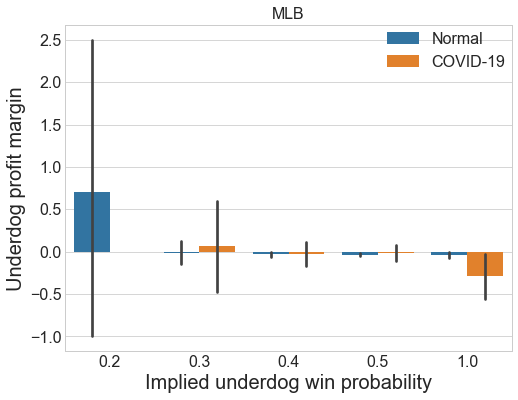

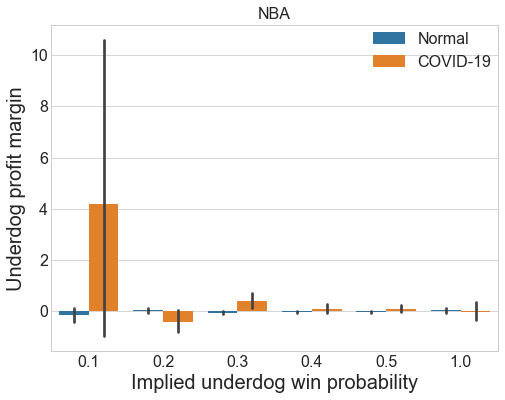

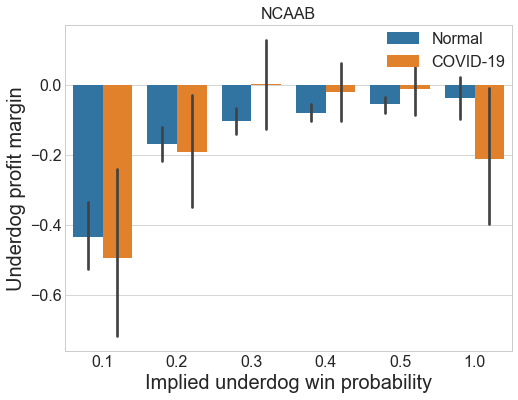

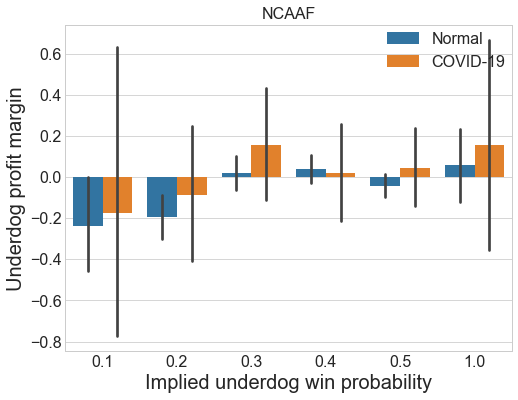

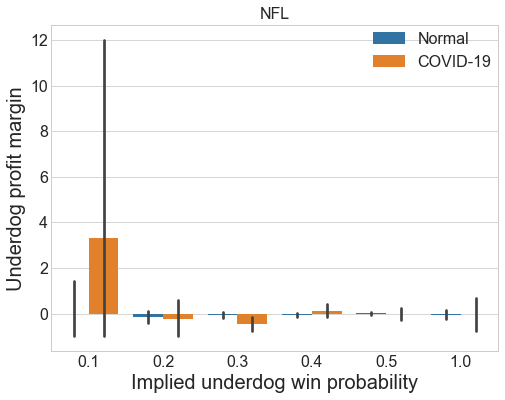

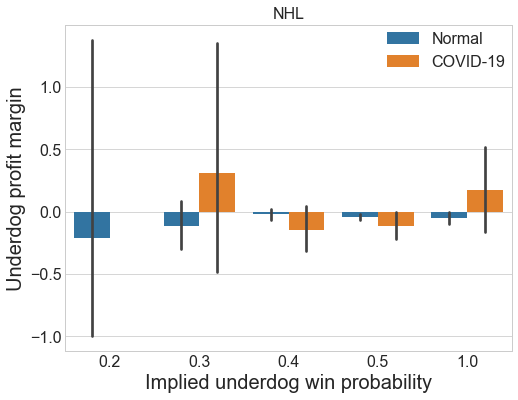

In [15]:
for sport in data.sport.sort_values().unique():
    df = data[data.sport == sport]
    bin_width = 0.1

    df_plot = df.groupby(by = ['prob_underdog_bin','covid']).mean().reset_index()
    df_count = df.groupby(by = ['prob_underdog_bin','covid']).count().reset_index()


    fig = plt.figure(figsize = (8,6))
    plt.subplot(1,1,1)
    ax = sns.barplot(data = df, x = 'prob_underdog_bin', y = 'profit_margin_underdog',hue = 'covid_status')
    plt.xlabel('Implied underdog win probability',fontsize = FONTSIZE_AXES)
    plt.ylabel('Underdog profit margin',fontsize = FONTSIZE_AXES)
    plt.xticks(fontsize = FONTSIZE_TICKS)
    plt.yticks(fontsize = FONTSIZE_TICKS)
    plt.title(sport,fontsize = 16)
    plt.legend(loc=1, borderaxespad=0, fontsize=FONTSIZE_TICKS)


    plt.show()




## Underdog Win Probability vs Implied Win Probability

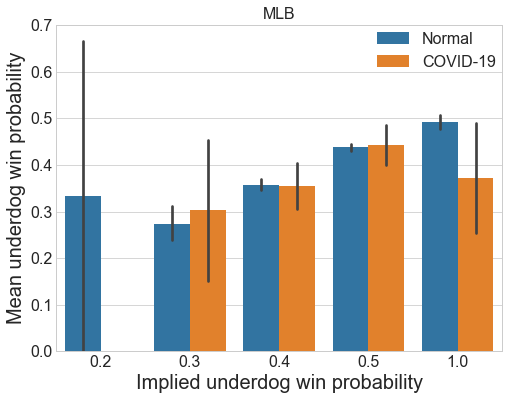

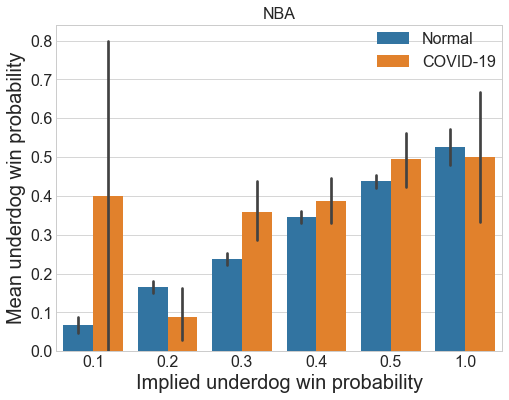

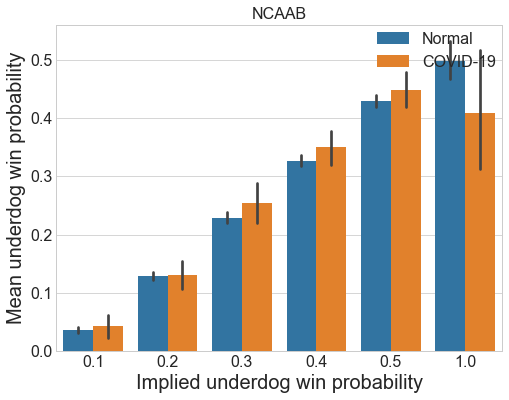

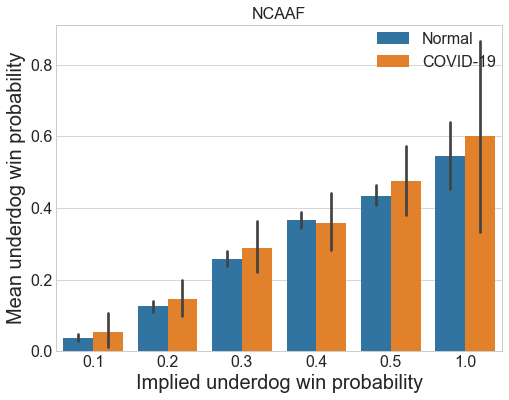

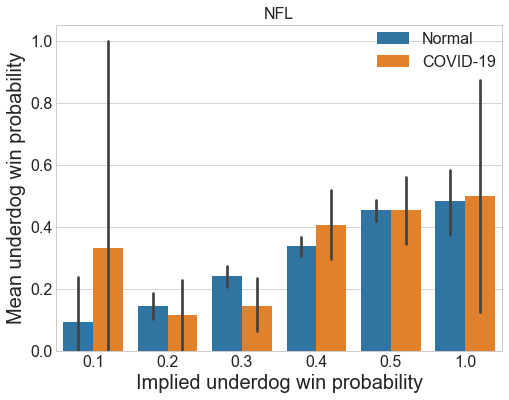

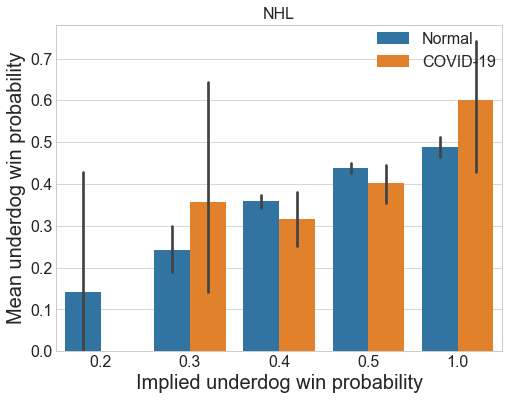

In [16]:
for sport in data.sport.sort_values().unique():
    df = data[data.sport == sport]
    bin_width = 0.1

    df_plot = df.groupby(by = ['prob_underdog_bin','covid']).mean().reset_index()
    df_count = df.groupby(by = ['prob_underdog_bin','covid']).count().reset_index()


    fig = plt.figure(figsize = (8,6))
    plt.subplot(1,1,1)
    ax = sns.barplot(data = df, x = 'prob_underdog_bin', y = 'win_underdog',hue = 'covid_status')
    plt.xlabel('Implied underdog win probability',fontsize = FONTSIZE_AXES)
    plt.ylabel('Mean underdog win probability',fontsize = FONTSIZE_AXES)
    plt.xticks(fontsize = FONTSIZE_TICKS)
    plt.yticks(fontsize = FONTSIZE_TICKS)
    plt.legend(loc=1, borderaxespad=0, fontsize=FONTSIZE_TICKS)
    plt.title(sport,fontsize = 16)

    plt.show()




### Test COVID-19 impact in NBA implied probability buckets

#### Underedog win probability


In [17]:
df = data[data.sport == "NBA"]

alpha = 0.05

pvals = []
probs = []
for prob in df.prob_underdog_bin.sort_values().unique():
    X1 = df.win_underdog[(df.prob_underdog_bin==prob) & (df.covid==False)]
    X2 = df.win_underdog[(df.prob_underdog_bin==prob) & (df.covid==True)]
    tstat, pval = stats.ks_2samp(X1, X2)
    pvals.append(pval)
    probs.append(prob)

print(f"\nHolm-Bonferonni\nKS Test for Covid impact on \nunderdog win\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(probs,pvals,alpha)

pvals = []
probs = []
for prob in df.prob_underdog_bin.sort_values().unique():
    X1 = df.win_underdog[(df.prob_underdog_bin==prob) & (df.covid==False)]
    X2 = df.win_underdog[(df.prob_underdog_bin==prob) & (df.covid==True)]
    tstat, pval = stats.mannwhitneyu(X1, X2)
    pvals.append(pval)
    probs.append(prob)

print(f"\nHolm-Bonferonni\nMWU Test for Covid impact on \nunderdog win\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(probs,pvals,alpha)

pvals = []
probs = []
for prob in df.prob_underdog_bin.sort_values().unique():
    X1 = df.win_underdog[(df.prob_underdog_bin==prob) & (df.covid==False)]
    X2 = df.win_underdog[(df.prob_underdog_bin==prob) & (df.covid==True)]
    tstat, pval = stats.ttest_ind(X1, X2, equal_var = False)
    pvals.append(pval)
    probs.append(prob)

print(f"Holm-Bonferonni\nWelch Test for Covid impact on \nunderdog win\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(probs,pvals,alpha)



Holm-Bonferonni
KS Test for Covid impact on 
underdog win
alpha = 0.05
1: 0.3: pval = 0.0245, threshold = 0.0083, reject =0
2: 0.5: pval = 0.5045, threshold = 0.0100, reject =0
3: 0.1: pval = 0.5431, threshold = 0.0125, reject =0
4: 0.4: pval = 0.8103, threshold = 0.0167, reject =0
5: 0.2: pval = 0.8222, threshold = 0.0250, reject =0
6: 1.0: pval = 1.0000, threshold = 0.0500, reject =0

Holm-Bonferonni
MWU Test for Covid impact on 
underdog win
alpha = 0.05
1: 0.3: pval = 0.0003, threshold = 0.0083, reject =1
2: 0.1: pval = 0.0021, threshold = 0.0100, reject =1
3: 0.2: pval = 0.0493, threshold = 0.0125, reject =0
4: 0.5: pval = 0.0509, threshold = 0.0167, reject =0
5: 0.4: pval = 0.0942, threshold = 0.0250, reject =0
6: 1.0: pval = 0.3952, threshold = 0.0500, reject =0
Holm-Bonferonni
Welch Test for Covid impact on 
underdog win
alpha = 0.05
1: 0.3: pval = 0.0025, threshold = 0.0083, reject =1
2: 0.2: pval = 0.0392, threshold = 0.0100, reject =0
3: 0.5: pval = 0.1061, threshold = 0.01

#### Underedog profit margin


In [18]:
df = data[data.sport == "NBA"]

alpha = 0.05

pvals=[]
probs = []
for prob in df.prob_underdog_bin.sort_values().unique():
    X1 = df.profit_margin_underdog[(df.prob_underdog_bin==prob) & (df.covid==False)]
    X2 = df.profit_margin_underdog[(df.prob_underdog_bin==prob) & (df.covid==True)]
    tstat, pval = stats.ks_2samp(X1, X2)
    pvals.append(pval)
    probs.append(prob)
print(f"\nHolm-Bonferonni test\nKS test for Covid impact on \nunderdog profit margin\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(probs,pvals,alpha)

pvals=[]
probs = []
for prob in df.prob_underdog_bin.sort_values().unique():
    X1 = df.profit_margin_underdog[(df.prob_underdog_bin==prob) & (df.covid==False)]
    X2 = df.profit_margin_underdog[(df.prob_underdog_bin==prob) & (df.covid==True)]
    tstat, pval = stats.mannwhitneyu(X1, X2)
    pvals.append(pval)
    probs.append(prob)
print(f"\nHolm-Bonferonni test\nMann Whitney U test for Covid impact on \nunderdog profit margin\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(probs,pvals,alpha)

pvals = []
probs = []
for prob in df.prob_underdog_bin.sort_values().unique():
    X1 = df.profit_margin_underdog[(df.prob_underdog_bin==prob) & (df.covid==False)]
    X2 = df.profit_margin_underdog[(df.prob_underdog_bin==prob) & (df.covid==True)]
    tstat, pval = stats.ttest_ind(X1, X2, equal_var = False)
    pvals.append(pval)
    probs.append(prob)
    
print(f"\nHolm-Bonferonni correction\nWelch Test for Covid impact on \nunderdog profit margin\nalpha = {alpha:.2f}")

df_pval = holm_bonferonni(probs,pvals,alpha)


Holm-Bonferonni test
KS test for Covid impact on 
underdog profit margin
alpha = 0.05
1: 0.3: pval = 0.0234, threshold = 0.0083, reject =0
2: 0.5: pval = 0.4847, threshold = 0.0100, reject =0
3: 0.1: pval = 0.5431, threshold = 0.0125, reject =0
4: 0.4: pval = 0.8103, threshold = 0.0167, reject =0
5: 0.2: pval = 0.8222, threshold = 0.0250, reject =0
6: 1.0: pval = 1.0000, threshold = 0.0500, reject =0

Holm-Bonferonni test
Mann Whitney U test for Covid impact on 
underdog profit margin
alpha = 0.05
1: 0.3: pval = 0.0005, threshold = 0.0083, reject =1
2: 0.1: pval = 0.0021, threshold = 0.0100, reject =1
3: 0.2: pval = 0.0514, threshold = 0.0125, reject =0
4: 0.5: pval = 0.0652, threshold = 0.0167, reject =0
5: 0.4: pval = 0.0974, threshold = 0.0250, reject =0
6: 1.0: pval = 0.2777, threshold = 0.0500, reject =0

Holm-Bonferonni correction
Welch Test for Covid impact on 
underdog profit margin
alpha = 0.05
1: 0.3: pval = 0.0031, threshold = 0.0083, reject =1
2: 0.2: pval = 0.0498, thresh

# Underdog Win Probability and Profit Margin for Covid-19 and Post COVID-19

Plot of average underdog profit margin for the NBA versus season and COVID-19 game status.

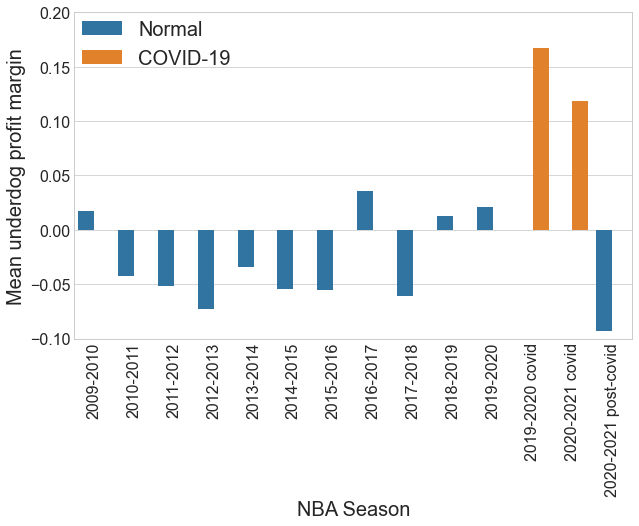

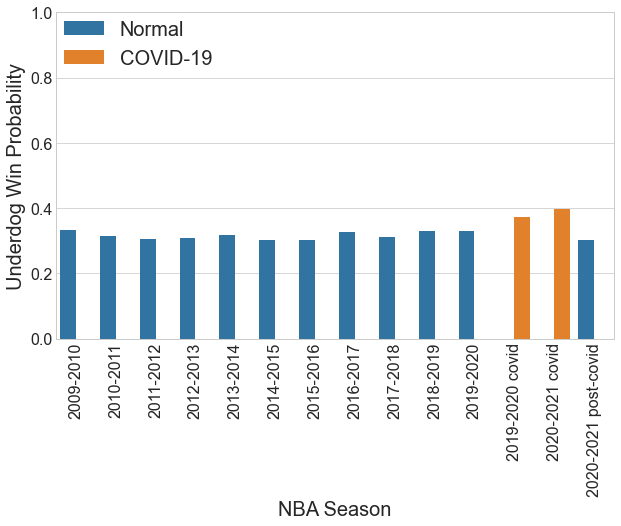

In [19]:
nba = data[data['sport'] == 'NBA']

fig = plt.figure(figsize = (10,6))


ax = sns.barplot(data = nba, x = 'season_covid', y = 'profit_margin_underdog', 
                 hue = 'covid_status', palette = "tab10",ci=None)
plt.xlabel('NBA Season',fontsize = FONTSIZE_AXES)
plt.ylabel('Mean underdog profit margin',fontsize = FONTSIZE_AXES)
#plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0, fontsize=FONTSIZE_AXES)
plt.legend(loc=2, borderaxespad=0, fontsize=FONTSIZE_AXES)
#plt.grid()
plt.yticks(fontsize = FONTSIZE_TICKS)
plt.xticks(rotation='90', fontsize=FONTSIZE_TICKS)
plt.ylim([-0.1,0.2])
plt.show()

fig = plt.figure(figsize = (10,6))


ax = sns.barplot(data = nba, x = 'season_covid', y = 'win_underdog', 
                 hue = 'covid_status', palette = "tab10",ci=None)
plt.xlabel('NBA Season',fontsize = FONTSIZE_AXES)
plt.ylabel('Underdog Win Probability',fontsize = FONTSIZE_AXES)
#plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0, fontsize=FONTSIZE_AXES)
plt.legend(loc=2, borderaxespad=0, fontsize=FONTSIZE_AXES)
#plt.grid()
plt.yticks(fontsize = FONTSIZE_TICKS)
plt.xticks(rotation='90', fontsize=FONTSIZE_TICKS)
plt.ylim([0,1])
plt.show()

# Betting Strategies for the NBA 

We calculate the performance of different betting strategies for NBA games during COVID-19.  The betting is done daily.  The strategy parameters are

1. $\lambda$ = fraction of bankroll to bet each day. $0\leq\lambda\leq 1$

2. Weight function = a function of the implied underdog win probability $p$ that determines what fraction of the betting funds to allocate to a given game.  There are a variety of functions we test.

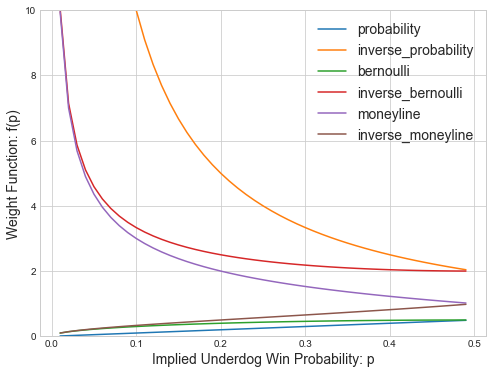

In [17]:
plt.figure(figsize = (8,6))

p = np.arange(0.01,0.5, 0.01)
df_p = pd.DataFrame({'p':p})
for scheme in SCHEMES:
    df_p[scheme] = df_p.p.apply(eval('{}_weight'.format(scheme)))
    plt.plot(p,df_p[scheme],label = scheme)
plt.ylim([0,10])
plt.xlabel('Implied Underdog Win Probability: p', fontsize=14)
plt.ylabel('Weight Function: f(p)', fontsize=14)

plt.legend(fontsize = 14)
plt.show()

In [20]:
nba = data[(data['sport'] == 'NBA') & (data.date <= ALL_STAR_BREAK)]
nba['prob_underdog'] = nba.ML_underdog.apply(win_probability)
nba['prob_underdog_bin'] = nba.prob_underdog.apply(prob_bin)
nba['profit_margin_underdog'] = data.ML_underdog.apply(underdog_profit) * data.win_underdog
nba.profit_margin_underdog[nba.win_underdog==0] = -1


risk_free = [j / 10 for j in range(11)]
results = {}
M_0 = 100
covid_nba = nba[nba.season_covid.str.contains('covid')]
for w_f in risk_free:
    for weighting in SCHEMES:
        results[weighting, w_f] = performance(data=covid_nba,
                                weighting=weighting,
                                initial=M_0,
                                risky_weight=w_f)

        



Testing probability scheme with $\lambda$ = 0.0
Testing inverse_probability scheme with $\lambda$ = 0.0
Testing bernoulli scheme with $\lambda$ = 0.0
Testing inverse_bernoulli scheme with $\lambda$ = 0.0
Testing moneyline scheme with $\lambda$ = 0.0
Testing inverse_moneyline scheme with $\lambda$ = 0.0
Testing probability scheme with $\lambda$ = 0.1
Testing inverse_probability scheme with $\lambda$ = 0.1
Testing bernoulli scheme with $\lambda$ = 0.1
Testing inverse_bernoulli scheme with $\lambda$ = 0.1
Testing moneyline scheme with $\lambda$ = 0.1
Testing inverse_moneyline scheme with $\lambda$ = 0.1
Testing probability scheme with $\lambda$ = 0.2
Testing inverse_probability scheme with $\lambda$ = 0.2
Testing bernoulli scheme with $\lambda$ = 0.2
Testing inverse_bernoulli scheme with $\lambda$ = 0.2
Testing moneyline scheme with $\lambda$ = 0.2
Testing inverse_moneyline scheme with $\lambda$ = 0.2
Testing probability scheme with $\lambda$ = 0.3
Testing inverse_probability scheme with 

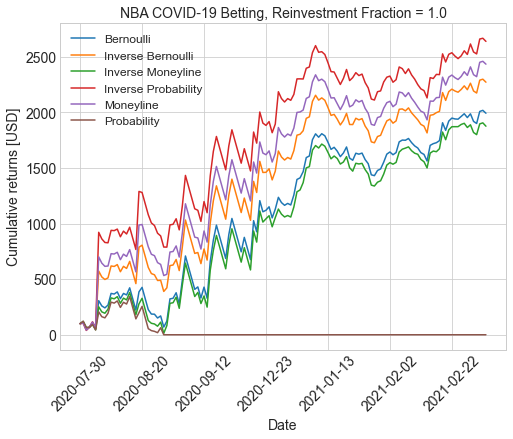

In [22]:
lambda_r = 1.0
cumulative = pd.concat(results).unstack().T
cum_plot = cumulative.xs(lambda_r, level=1, axis=1)
cum_plot.columns = [j.replace('_', ' ').title() for j in cum_plot.columns]

cum_plot.plot(figsize=(8, 6))
plt.xticks(rotation='45', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.ylabel(r'Cumulative returns [USD]', fontsize=14)
plt.xlabel(r'Date', fontsize=14)
plt.legend(fontsize=12)
plt.title(f"NBA COVID-19 Betting, Reinvestment Fraction = {lambda_r}", fontsize = 14)
plt.show()